In [3]:
import pandas as pd
from xml.dom import minidom
import drawSvg as draw
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [25]:
# 11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml
file = "../MoneyQuestion/1_87e0502d-d7cf-4778-83d6-ed7fb84ee161.xml"
data = minidom.parse(file)
points = data.getElementsByTagName('point')
point_dic = {}
axis = [100000,0,100000,0]
for el in points:
    x = el.attributes['x'].value
    axis[0] = min(axis[0],int(x))
    axis[1] = max(axis[1],int(x))
    y = el.attributes['y'].value
    axis[2] = min(axis[2],int(y))
    axis[3] = max(axis[3],int(y))
    time = el.attributes['time'].value
    point_dic[el.attributes['id'].value] = (x ,y , time);
print(len(point_dic))
axis = [axis[0]-50, axis[1]+50, axis[2]-50, axis[3]+50]
print(axis)

570
[133, 1155, 127, 344]


[133, 1155, 127, 344]


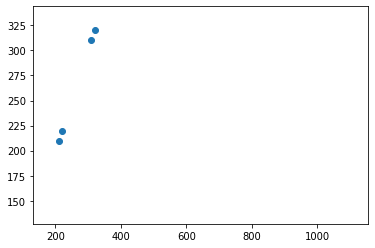

In [40]:
data = minidom.parse(file)
points = data.getElementsByTagName('point')
strokes = data.getElementsByTagName('stroke')
plt.axis(axis)
print(axis)
t = 1;
X, Y = [], []
for i in range(len(strokes)):
    st = strokes[i]
    pts = st.getElementsByTagName('arg')
    x = [int(point_dic[pt.firstChild.nodeValue][0]) for pt in pts]
    y = [int(point_dic[pt.firstChild.nodeValue][1]) for pt in pts]
    X.append(x)
    Y.append(y)
    plt.axis(axis)
plt.scatter([[210, 220],[310, 320]], [[210, 220],[310, 320]])

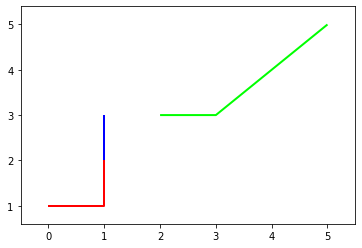

In [43]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0, 1), (1, 1), (1, 2)], [(2, 3), (3, 3), (5, 5)], [(1, 2), (1, 3)]]

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

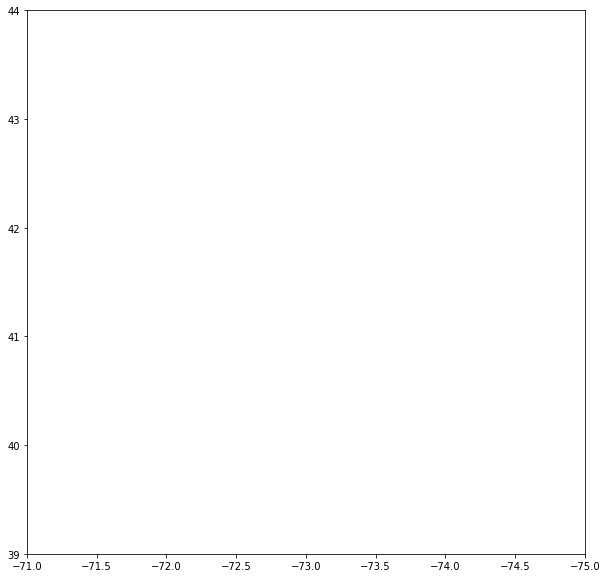

In [61]:
import matplotlib
#use Qt5 as backend, comment this line for default backend

from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(0, 100))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

rectangles = plt.bar([0.5,1,1.5],[50,40,90],width=0.1) #rectangles to animate

patches = lines + list(rectangles) #things to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    #init rectangles
    for rectangle in rectangles:
        rectangle.set_height(0)

    return patches #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data([0, 2], [10 * j,i])

    #animate rectangles
    for j,rectangle in enumerate(rectangles):
        rectangle.set_height(i/(j+1))

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.show()

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: list index out of range

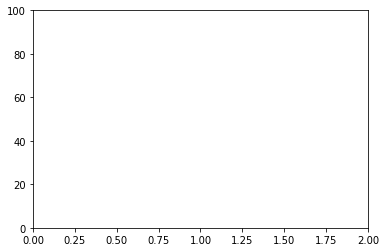

In [58]:
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(0, 100))

line, = plt.plot([], [])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data([0, 2], [0,i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

from celluloid import Camera
cm = Camera(fig)
animation = cm.animate()
animation.save('animation.gif', writer='PillowWriter', fps=2)

AttributeError: 'FuncAnimation' object has no attribute 'start'

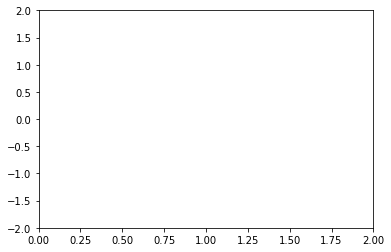

In [50]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
plt.show()

x [447 447 451 460 470 494]
y [188 187 186 185 183 181]
x [469 469 468 475 490 512 546]
y [435 435 434 434 433 431 428]
x [527 525 523 523 523 523 523 525 525 526 527 528 528 528 528 529]
y [178 178 178 175 171 165 158 151 150 152 158 172 181 189 195 198]
x [836 838 846 858 863 863 859 857 864 902 941]
y [161 158 154 157 165 177 190 208 211 207 199]
x [617 619 638 657 674 687 695 697 690 678]
y [392 389 379 375 375 380 387 401 421 431]
x [362 356 351 347 345 357 409 422 464]
y [144 146 149 159 177 237 291 298 308]
x [667 667 670 678 689 702 710 692 652 631]
y [125 125 133 147 167 189 237 268 296 299]
x [774 774 770 770 770 771 769]
y [163 163 180 198 216 233 245]
x [365 368 388 435 475 528 669 775 856 892 908 911 909]
y [594 594 594 594 594 593 589 582 566 544 501 476 407]


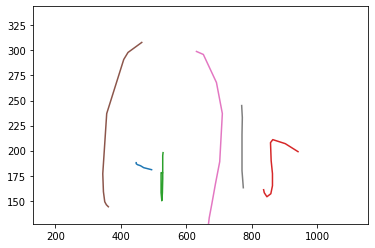

In [6]:
files = ['annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Minus_July_22_2015_ 1_39_46_PM.mat',
        'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Minus_July_22_2015_ 1_40_10_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Number_July_22_2015_ 1_39_41_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Number_July_22_2015_ 1_39_59_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Number_July_22_2015_ 1_40_06_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Parenthesis Left_July_22_2015_ 1_39_13_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Parenthesis Left_July_22_2015_ 1_39_24_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Plus_July_22_2015_ 1_39_53_PM.mat',
         'annot_11_8c8aeac7-27d1-46e0-8a43-6cbe03fb5753.xml_Rectangle_July_22_2015_ 1_40_32_PM.mat']

for f in files:
    mat = scipy.io.loadmat(f)
    data = mat['annotData']
    val = data[0,0]
    coords = val['sketch']['coords'][0,0]
    print("x" ,coords[:,0])
    print("y" ,coords[:,1])
    x = np.append(x, coords[:, 0])
    y = np.append(y, coords[:, 1])
    plt.axis(axis)
    plt.plot(coords[:,0], coords[:,1])

coords [688 688 687 685 682 679 675 670 667 665 666]
coords [588 588 590 596 603]
coords [826 826 828 831 834 842 846 842 838 833 834 837 849 852]
coords [744 746 751 755 760 769 772]
coords [694 694 700 705 708 710 711 707 705 708 713 711 693]
coords [603 602 599 597 596 597 611 616 613 602 597]
coords [471 473 475 477 480 482 485 487 487 488 489 489 489 490 490 491]
coords [768 768 768 769 769 770 771 772 773 774 772]
coords [663 663 663 664 665 665 665 665 663]


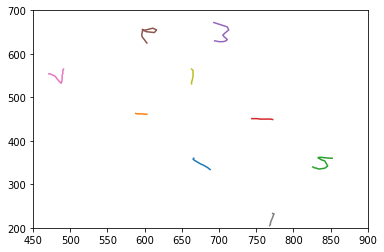

In [296]:
files = ['annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Division_July_22_2015_11_49_15_AM.mat',
        'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Minus_July_22_2015_11_49_19_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Number_July_22_2015_11_49_29_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Number_July_22_2015_11_49_32_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Number_July_22_2015_11_49_39_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Number_July_22_2015_11_49_44_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Number_July_22_2015_11_49_48_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Plus_July_22_2015_11_49_09_AM.mat',
         'annot_11_4aad22e3-4075-4871-b5e5-30c933078a31.xml_Star Bullet_July_22_2015_11_49_24_AM.mat']

for f in files:
    mat = scipy.io.loadmat(f)
    data = mat['annotData']
    val = data[0,0]
    coords = val['sketch']['coords'][0,0]
    print("coords" ,coords[:,0])
    x = np.append(x, coords[:, 0])
    y = np.append(y, coords[:, 1])
    plt.axis([450, 900,200,700])
    plt.plot(coords[:,0], coords[:,1])

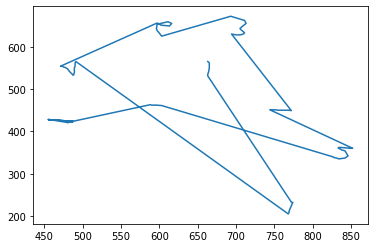

In [185]:
plt.plot(x,y)